** This notebook** investigates various **vertical 230Th profiles** in the Arctic. It is trying to understand what's relation between each profile and trying to better parameterize our coeff.

In [2]:
import netCDF4 as nc
import matplotlib.pyplot as plt
import numpy as np
import copy
import os
import glob
import pylab as pl
import numpy as np
import pandas as pd
import types
from mpl_toolkits.basemap import cm,addcyclic,Basemap, shiftgrid
import matplotlib.cm as cm
% matplotlib inline

nc_filename = sorted(glob.glob('/ocean/xiaoxiny/research/data/total/T*.csv'))
nc_filename_= sorted(glob.glob('/ocean/xiaoxiny/research/data/findk/All_Arctic-data/WLS/Th/*.csv'))
print("found *.csv file: \n{}".format(nc_filename))



filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*T200201-200712*.nc'))
ptrc=nc.Dataset(filename[0])
nav_lon=ptrc.variables['nav_lon'][:]
nav_lat=ptrc.variables['nav_lat'][:]
dep = ptrc.variables['deptht'][:]

bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
bathy=bathy.variables['Bathymetry'][400:,:]

found *.csv file: 
['/ocean/xiaoxiny/research/data/total/Total_r1.csv', '/ocean/xiaoxiny/research/data/total/Total_r2.csv', '/ocean/xiaoxiny/research/data/total/Total_r3.csv', '/ocean/xiaoxiny/research/data/total/Total_r4.csv', '/ocean/xiaoxiny/research/data/total/Total_r5.csv', '/ocean/xiaoxiny/research/data/total/Total_r6.csv']


In [3]:
#data in 2005
               # th1    #th2
elat=np.array([83.114,   87.623  ]) #     83°06.826 87°37.375 N  
elon=np.array([-174.88,  156.09  ]) #   174°52.689W 156°05.581 E

dep_th1=np.array([20.1,100.0,292.5,491.3,691.5,1091.5,1290.9,1491.4,1691.5,1891.1,2092.1,2290.9,2480.4,2692.2])
con_th1=np.array([0.23097531,0.3115801186,0.5066939254,0.6922778619,0.6283046556,0.7627209815,0.7814033969,
        1.0046730342,0.9339497418,1.096588395,1.1791569817,1.2986671687,1.3412285366,1.6945276994])

dep_th2=np.array([2.2,20.5,127.0,258.2,408.8,610.4,913.6,1217.6,1523.3,1830.4,
     2138.6,2441.3,2752.3,3062.9,3720.8,4028.6])
con_th2=np.array([0.2408122073,0.2612594506,0.4828673279,0.9891112582,0.7759438555,0.8382833503,0.9810394531,
     1.2535573266,1.5174676222,1.7516785761,1.9769771391,1.9348387143,1.9717981823,2.1756327796,2.4095804438,2.4280244504])

# In Canada Basin:

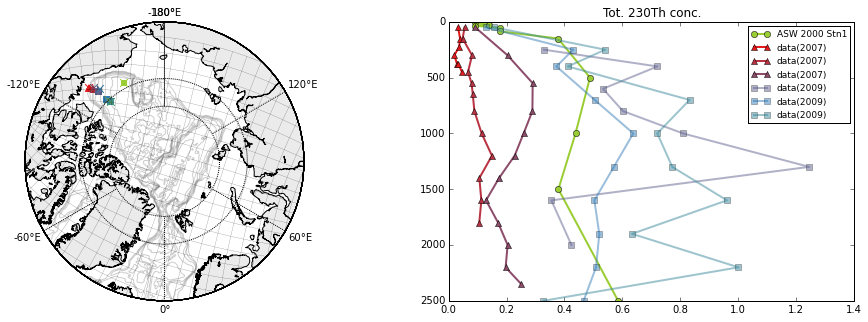

In [4]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=65,lon_0=0,resolution='l',round='True')

#data from Roger
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=30,color=cm.Set1(j*8),label='data(2009)')
    if j>=3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=30,color=cm.Set1(j*8),label='data(2009)',alpha=0.5)

#data from ASW2000    
data=pd.read_csv(nc_filename_[11])
y=data['230Th part.']+data['230Th diss.'];
lon = data['long.'];
lat = data['lat.'];
name= data['name'][0];

lon=np.ma.masked_where(y<=0,lon)
lat=np.ma.masked_where(y<=0,lat) 

lon=lon.compressed();lat=lat.compressed()
  
y_lon, yy_lat = m(lon, lat)
m.scatter(y_lon,yy_lat,color='yellowgreen',label=name)
    
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)

m.scatter(x_lon[303,150],y_lat[303,150],color=cm.Set1(0*18),marker='x',s=60)
m.scatter(x_lon[302,160],y_lat[302,160],color=cm.Set1(1*18),marker='x',s=60)
m.scatter(x_lon[300,170],y_lat[300,170],color=cm.Set1(2*18),marker='x',s=60)
m.scatter(x_lon[313,210],y_lat[313,210],color='yellowgreen',marker='x',s=60)
m.scatter(x_lon[280,191],y_lat[280,191],color=cm.Set1(3*18),marker='x',s=60)
m.scatter(x_lon[284,185],y_lat[284,185],color=cm.Set1(4*18),marker='x',s=60)



ax = plt.subplot(1,2,2)

#aws2000
data=pd.read_csv(nc_filename_[11])
y= data['depth'].values;
x=data['230Th part.']+data['230Th diss.'];
name= data['name'][0];    
plt.plot(x,y,'-o',lw=2,color='yellowgreen',label=name)
            


# Roger's
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    #name= data['name'][0];
    y_=[];x_=[];lon_=[];lat_=[];
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            lon_.append(lon[i]);lat_.append(lat[i])
    if j<3 and len(lon_)!=0:
            plt.plot(x_,y_,'-^',lw=2,c=cm.Set1(j*8),label='data(2007)')
    if j>=3 and len(lon_)!=0:
            plt.plot(x_,y_,'-s',lw=2,c=cm.Set1(j*8),label='data(2009)',alpha=0.5) 


            
plt.legend(loc='upper right',prop={'size':9})#, bbox_to_anchor=(1.3,1),frameon=False)            
plt.ylim([0,2500])
plt.gca().invert_yaxis()
plt.title('Tot. 230Th conc.')
plt.show()

### Find relationship between concentration and bottom depth in Canada Basin

In [5]:
a=np.array([1,2,3,4])
a=np.ma.masked_where(a==a[3],a)
print a
a=a.compressed()
np.average(a)

[1 2 3 --]


2.0

In [6]:
xLoc=[313,303,302,300,300,280,284]
yLoc=[210,150,160,170,170,191,185]
colo=['yellowgreen',cm.Set1(0*18),cm.Set1(1*18),cm.Set1(2*18),cm.Set1(3*18),cm.Set1(4*18),cm.Set1(5*18)]

avgx=[]
namelist=[]
#aws2000
data=pd.read_csv(nc_filename_[11])
y= data['depth'].values;
x=data['230Th part.']+data['230Th diss.'];
name= data['name'][0];    
for i in range (len(y)):
    if y[i]<1000 or y[i] >2000:
        x=np.ma.masked_where(y==y[i],x)
avgx.append(np.average(x))
namelist.append(name)
        
        
# Roger's
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    name= data['name'][0];
    for i in range (len(y)):
        if y[i]<1000 or y[i] >2000:
            x=np.ma.masked_where(y==y[i],x)
    avgx.append(np.average(x))
    namelist.append(name)

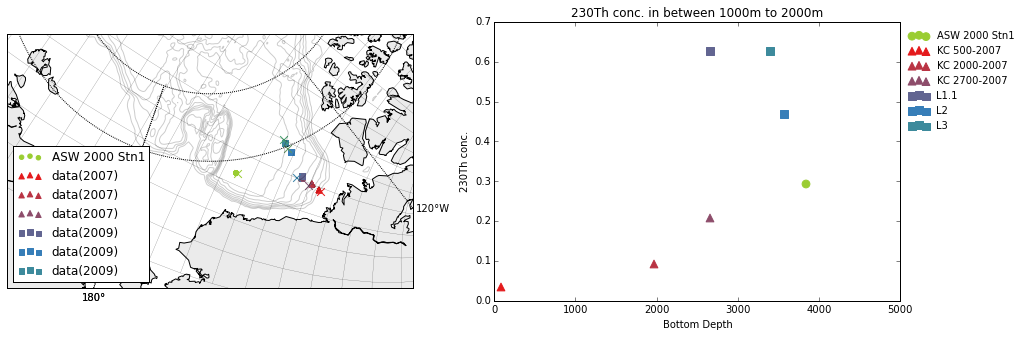

In [7]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(width =3345532*1,height =950905*2.2,lon_0=-160, lat_0=75,
                projection='stere', resolution='l')

#data from ASW2000    
data=pd.read_csv(nc_filename_[11])
y=data['230Th part.']+data['230Th diss.'];
lon = data['long.'];
lat = data['lat.'];
name= data['name'][0];

lon=np.ma.masked_where(y<=0,lon)
lat=np.ma.masked_where(y<=0,lat) 

lon=lon.compressed();lat=lat.compressed()
  
y_lon, yy_lat = m(lon, lat)
m.scatter(y_lon,yy_lat,color='yellowgreen',label=name)


#data from Roger
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=30,color=cm.Set1(j*8),label='data(2007)')
    if j>=3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=30,color=cm.Set1(j*8),label='data(2009)')


    
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[1, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[0, 1, 0, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)

m.scatter(x_lon[303,150],y_lat[303,150],color=cm.Set1(0*18),marker='x',s=60)
m.scatter(x_lon[302,160],y_lat[302,160],color=cm.Set1(1*18),marker='x',s=60)
m.scatter(x_lon[300,170],y_lat[300,170],color=cm.Set1(2*18),marker='x',s=60)
m.scatter(x_lon[313,210],y_lat[313,210],color='yellowgreen',marker='x',s=60)
m.scatter(x_lon[280,191],y_lat[280,191],color=cm.Set1(3*18),marker='x',s=60)
m.scatter(x_lon[285,185],y_lat[284,185],color=cm.Set1(4*18),marker='x',s=60)
plt.legend(loc=3)


ax = plt.subplot(1,2,2)
colo=['yellowgreen',cm.Set1(0*8),cm.Set1(1*8),cm.Set1(2*8),cm.Set1(3*8),cm.Set1(4*8),cm.Set1(5*8)]
mar=['o','^','^','^','s','s','s']
for i in range (len(xLoc)):
    plt.scatter(bathy[xLoc[i],yLoc[i]],avgx[i],marker=mar[i],color=colo[i],s=60,label=namelist[i])
plt.legend(loc=2,prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlim(0,5000);plt.ylim(0,0.7);plt.xlabel('Bottom Depth');
plt.ylabel('230Th conc.');plt.title('230Th conc. in between 1000m to 2000m')

Pa profiles are not availble in 2009 and 2000.

# On Ridges:

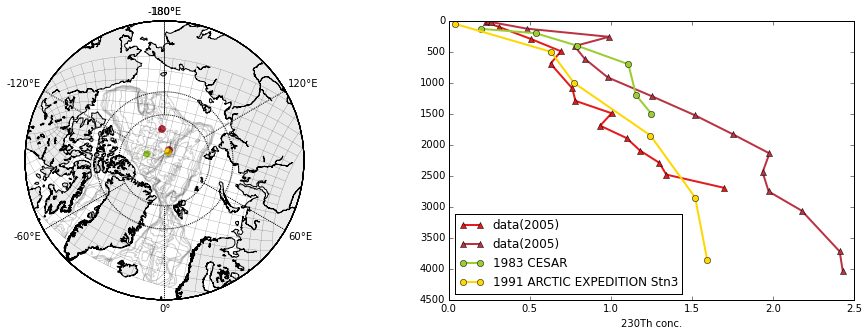

In [76]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

#data from Roger  
y_lon, yy_lat = m(elon, elat)
for j in range (len(y_lon)):
    m.scatter(y_lon,yy_lat,color=cm.Set1(j*8),s=40,label='data (2005)')

#data from 1983   
data=pd.read_csv(nc_filename_[0])
lon = data['long.'];
lat = data['lat.'];
name= data['name'][0];  
y_lon, yy_lat = m(lon[0], lat[0])
m.scatter(y_lon,yy_lat,color='yellowgreen',s=40,label=name)

#data from 1991   
data=pd.read_csv(nc_filename_[7])
lon = data['long.'];
lat = data['lat.'];
name= data['name'][0];  
y_lon, yy_lat = m(lon[0], lat[0])
m.scatter(y_lon,yy_lat,color='gold',s=40,label=name)



#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#2005
plt.plot(con_th1,dep_th1,'-^',color=cm.Set1(0*8),lw=2,label='data(2005)')
plt.plot(con_th2,dep_th2,'-^',lw=2,color=cm.Set1(1*8),label='data(2005)')

#1983
data=pd.read_csv(nc_filename_[0])
y= data['depth'].values;
x=data['230Th part.']+data['230Th diss.'];
x=np.ma.masked_where(y<=0,x)
y=np.ma.masked_where(y<=0,y) 
name= data['name'][0];    
plt.plot(x,y,'-o',lw=2,color='yellowgreen',label=name)


#1991
data=pd.read_csv(nc_filename_[7])
y= data['depth'].values;
x=data['230Th part.']+data['230Th diss.'];
x=np.ma.masked_where(y<=0,x)
y=np.ma.masked_where(y<=0,y) 
name= data['name'][0];    
plt.plot(x,y,'-o',lw=2,color='gold',label=name)


plt.gca().invert_yaxis()
#label
plt.legend(loc=3);plt.xlabel('230Th conc.');plt.show()

# Nansen Basin

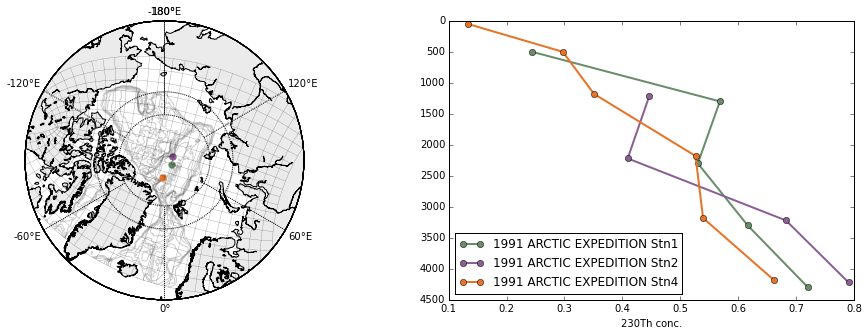

In [77]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

for j in ([5,6,8]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,color=cm.Set1(j*15),s=40,label=name)

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
for j in ([5,6,8]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']+data['230Th diss.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=cm.Set1(j*15),label=name)



plt.gca().invert_yaxis()
#label
plt.legend(loc=3);plt.xlabel('230Th conc.');plt.show()

# All profiles

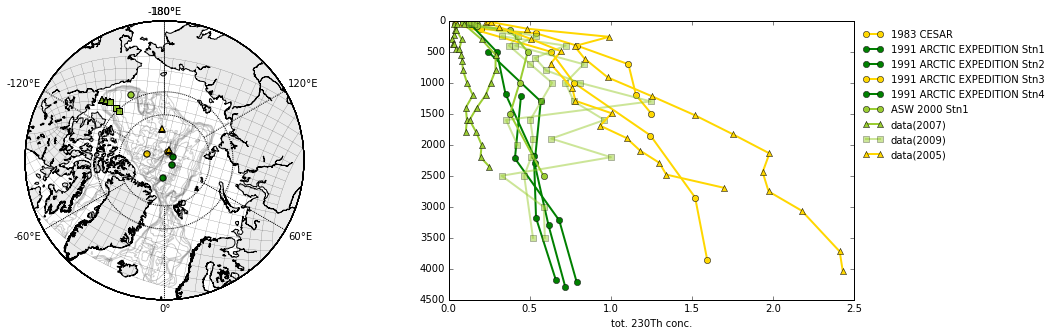

In [78]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple','yellowgreen']
# 1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],s=40,label=name)
    
#data from Roger in CB
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon_)!=0:        
        ax.hold(True)        
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=40,c='yellowgreen',label=name)
    if j>=3 and len(lon_)!=0:
        ax.hold(True)        
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=40,c='yellowgreen',label=name)
        
#data from Roger on Alpha Ridge
y_lon, yy_lat = m(elon, elat)
for j in range (len(y_lon)):
    m.scatter(y_lon,yy_lat,marker='^',c='gold',s=40,label='data (2005)')

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']+data['230Th diss.'];
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],label=name)

# Roger's in CB
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    #name= data['name'][0];
    y_=[];x_=[];lon_=[];lat_=[];
    for i in range (len(x)):
        if x[i]>=0:
            y_.append(y[i]);x_.append(x[i])
            lon_.append(lon[i]);lat_.append(lat[i])
    if j<3 and len(lon_)!=0:
        if j ==0:
            plt.plot(x_,y_,'-^',lw=2,c='yellowgreen',label='data(2007)')
        else:
            plt.plot(x_,y_,'-^',lw=2,c='yellowgreen')#,label='data(2007)')
    if j>=3 and len(lon_)!=0:
        if j==3:
            plt.plot(x_,y_,'-s',lw=2,c='yellowgreen',label='data(2009)',alpha=0.5) 
        else:
            plt.plot(x_,y_,'-s',lw=2,c='yellowgreen',alpha=0.5)#,label='data(2009)') 
                       
            
#Roger's AR 2005
plt.plot(con_th1,dep_th1,'-^',color='gold',lw=2,label='data(2005)')
plt.plot(con_th2,dep_th2,'-^',lw=2,color='gold')

plt.gca().invert_yaxis()
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('tot. 230Th conc.');plt.show()

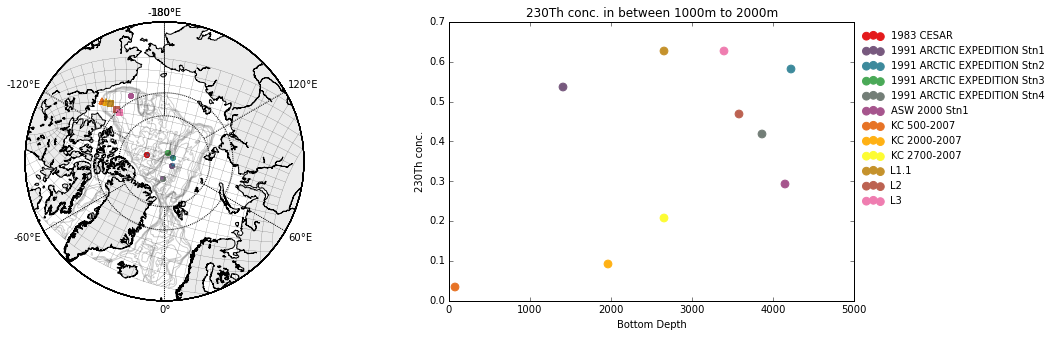

In [57]:
xLoc=[313,205,200,216,221,168,303,302,300,300,280,284]
yLoc=[210,268,323,320,306,310,150,160,170,170,191,185]


avgx=[]
namelist=[]
for num in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[num])
    y= data['depth'].values;
    x=data['230Th part.']+data['230Th diss.'];
    name= data['name'][0];    
    for i in range (len(y)):
        if y[i]<1000 or y[i] >2000:
            x=np.ma.masked_where(y==y[i],x)
    avgx.append(np.average(x))
    namelist.append(name)
        
        
# Roger's
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y= data['depth'].values;
    x=data['230Th tot.'].values;
    lon = data['long.'].values;
    lat = data['lat.'].values;
    name= data['name'][0];
    for i in range (len(y)):
        if y[i]<1000 or y[i] >2000:
            x=np.ma.masked_where(y==y[i],x)
    avgx.append(np.average(x))
    namelist.append(name)
    
    

ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')

#data from ASW2000  
i=0
for num in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[num])
    y=data['230Th part.']+data['230Th diss.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed();lat=lat.compressed()

    y_lon, yy_lat = m(lon, lat)
    m.scatter(y_lon,yy_lat,color=cm.Set1(i*20),label=name)
    i+=1


#data from Roger
for j in range(len(nc_filename)):
    data=pd.read_csv(nc_filename[j])
    y=data['230Th tot.'];
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];

    lon=np.ma.masked_where(y<=0,lon)
    lat=np.ma.masked_where(y<=0,lat) 

    lon=lon.compressed()
    lat=lat.compressed()
    
    if j<3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='^',s=30,color=cm.Set1((j+i)*20),label='data(2007)')
    if j>=3 and len(lon)!=0:
        y_lon, yy_lat = m(lon, lat)
        m.scatter(y_lon,yy_lat,marker='s',s=30,color=cm.Set1((j+i)*20),label='data(2009)')


    
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)

m.scatter(x_lon[205,268],y_lat[205,268],color=cm.Set1(1*18),marker='x',s=10)
m.scatter(x_lon[200,323],y_lat[200,323],color=cm.Set1(2*18),marker='x',s=10)
m.scatter(x_lon[216,320],y_lat[216,320],color=cm.Set1(3*18),marker='x',s=10)
m.scatter(x_lon[221,306],y_lat[221,306],color=cm.Set1(4*18),marker='x',s=10)
m.scatter(x_lon[168,310],y_lat[168,310],color=cm.Set1(5*18),marker='x',s=10)

#plt.legend(loc=3)


ax = plt.subplot(1,2,2)
for i in range (len(xLoc)):
    plt.scatter(bathy[xLoc[i],yLoc[i]],avgx[i],color=cm.Set1(i*20),s=60,label=namelist[i])
plt.legend(loc=2,prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlim(0,5000);plt.ylim(0,0.7);plt.xlabel('Bottom Depth');
plt.ylabel('230Th conc.');plt.title('230Th conc. in between 1000m to 2000m')

In [79]:
### below calculate the weighted least square fit.

import statsmodels.api as sm

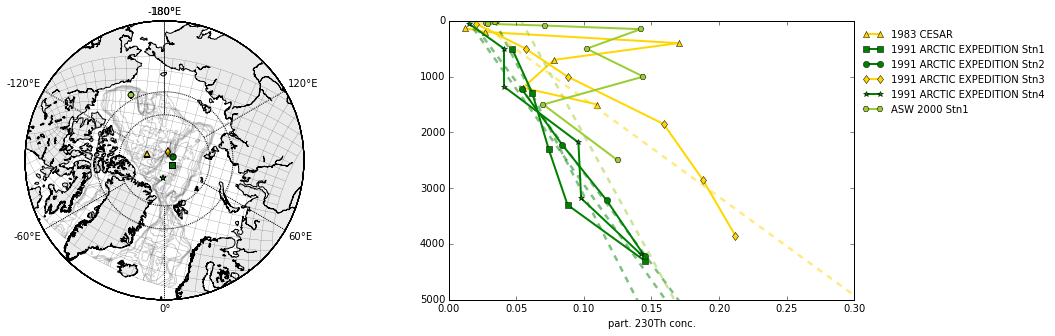

In [80]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.']#+data['230Th diss.'];
    err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    x=np.ma.masked_where(y<=0,x)
    y=np.ma.masked_where(y<=0,y) 
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1

    y2 = sm.add_constant(y,prepend=False)
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()#conc. depth
    if j !=0:
        plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
             '--.',c=col[j],linewidth=2.5,alpha=0.5)
    

plt.xlim(0,0.3);plt.ylim(0,5000);plt.gca().invert_yaxis();
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('part. 230Th conc.');plt.show()

```
lowest ice conc. :
    
    1983:  90%
    1991:  86%  
    1991:  83%
    1991:  80%
    1991:  71%
    2000:  15%
```

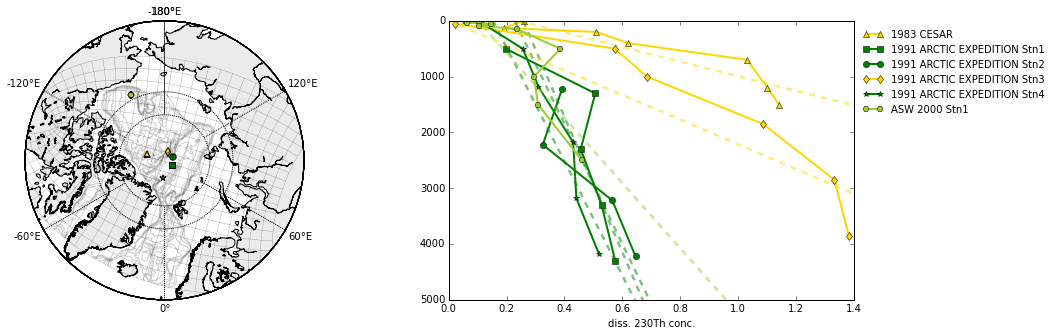

In [81]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0
# 1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1

#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
#1983,1991
i=0
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th diss.'];
    err =data['Th_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x)
    
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name)
    i+=1
    
    y2 = sm.add_constant(y,prepend=False)
    res_wls = sm.WLS(x, y2, weights=1./err**2).fit()#conc. depth
    plt.plot([0, 1.4],[0, 1.4]/res_wls.params[0]-res_wls.params[1]/res_wls.params[0], \
             '--.',c=col[j],linewidth=2.5,alpha=0.5)
    

plt.ylim(0,5000);plt.gca().invert_yaxis();
#label
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)
plt.xlabel('diss. 230Th conc.');plt.show()

#### Figures below investigate the analy. solution calculated from NEMO model

In [93]:
xloc=[700-400,630-400,600-400]
yloc=[200,300,350]
c=['yellowgreen','gold','green']

In [96]:
nc_filename=sorted(glob.glob('/ocean/xiaoxiny/research/result_jasper/tracer6/newsms/fse3t_based_mask/*MIN*.nc'))
ptrc=nc.Dataset(nc_filename[0])
icePa = ptrc.variables['TR_11'][:,:,xloc,yloc]
iceTh = ptrc.variables['TR_12'][:,:,xloc,yloc]
dep = ptrc.variables['deptht'][:]

Dsopt=nc.Dataset('/ocean/xiaoxiny/research/NEMO-code/NEMOGCM/CONFIG/myANHA/EXP00/data_Th_desorption_rate.nc')
k_1=Dsopt.variables['desorption_rate'][:,xloc,yloc]
       
print icePa.shape,k_1.shape

(19, 50, 3) (1, 3)


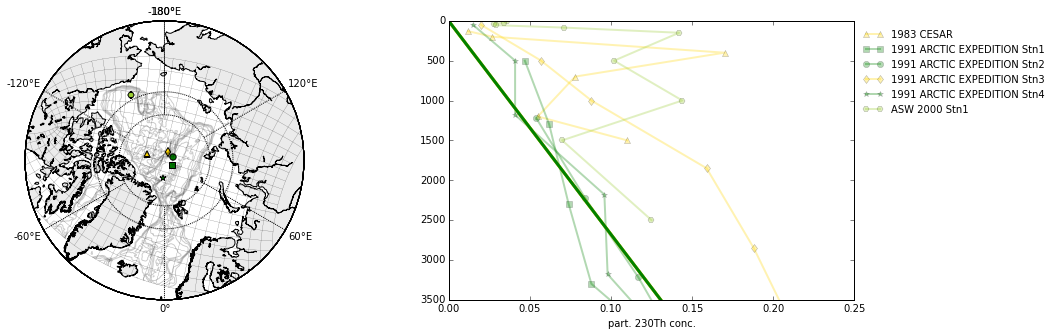

In [105]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0

# 1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
#draw basemap
m.drawcoastlines();m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
i=0
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th part.'];
    err =data['Th_part_err']
    
    err=np.ma.masked_where(x<=0,err)
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x)
    
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[i],label=name,alpha=0.3)
    i+=1

#analy. solution from NEMO:
for i in range(len(xloc)):
    k=-0.225*iceTh[-1,:,i]+0.2965
    s=715*iceTh[-1,:,i]/iceTh[-1,:,i]
    plt.plot(0.0267/s*dep,dep,c=c[i],lw=3)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)


plt.ylim(0,3500);plt.gca().invert_yaxis();plt.xlabel('part. 230Th conc.');

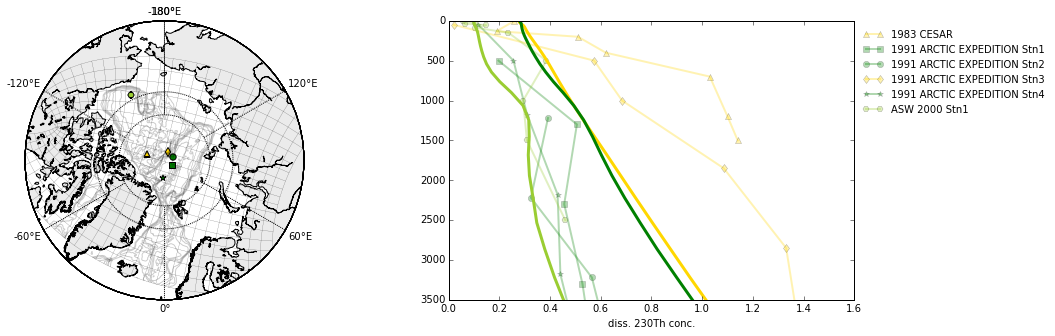

In [103]:
ax = plt.figure(1,figsize=(16,5))
ax = plt.subplot(1,2,1)
m = Basemap(projection='npstere',boundinglat=60,lon_0=0,resolution='l',round='True')
col=['gold','purple','purple','purple','purple','g','g','gold','g','purple','purple','yellowgreen']
mark=['^','s','o','d','*','H']
i=0

# 1983,1991
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    lon = data['long.'];
    lat = data['lat.'];
    name= data['name'][0];  
    y_lon, yy_lat = m(lon[0], lat[0])
    m.scatter(y_lon,yy_lat,c=col[j],marker=mark[i],s=40,label=name)
    i+=1
#draw basemap
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
m.drawparallels(np.arange(-90.,90.,15.),labels=[0, 0, 0, 0])
m.drawmeridians(np.arange(-180.,181.,60.),labels=[1, 1, 1, 1])
x_lon, y_lat = m(nav_lon[:], nav_lat[:])
m.plot(x_lon[::20,::20],y_lat[::20,::20],x_lon[::20,::20].T,y_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)
m.contour(x_lon,y_lat,bathy,linewidth=0.075,colors='black',alpha=0.2)


ax = plt.subplot(1,2,2)
imark=0
for j in ([0,5,6,7,8,11]):
    data=pd.read_csv(nc_filename_[j])
    y= data['depth'].values;
    x=data['230Th diss.'];
    err =data['Th_diss_err']
    
    err=np.ma.masked_where(x<=0,err)
    y=np.ma.masked_where(x<=0,y)
    x=np.ma.masked_where(x<=0,x)
    
    name= data['name'][0];    
    plt.plot(x,y,'-o',lw=2,color=col[j],marker=mark[imark],label=name,alpha=0.3)
    imark+=1

#analy. solution from NEMO:
for i in range(len(xloc)):
    k=-0.225*iceTh[-1,:,i]+0.2965
    s=715*iceTh[-1,:,i]/iceTh[-1,:,i]
    plt.plot(0.0267/k+k_1[0,i]/k*0.0267/s*dep,dep,c=c[i],lw=3)
plt.legend(loc='upper left', prop={'size':10}, bbox_to_anchor=(1,1),frameon=False)


plt.ylim(0,3500);plt.gca().invert_yaxis();plt.xlabel('diss. 230Th conc.');